<center><h1> Métodos Numéricos Computacionais - APS-AV2 - 2022.2 </h1></center><p>


---

* Aluno: João Pedro Espechit Silveira - 2019200901
* Professor: Sérgio Assunção Monteiro
* Turma: 145R<p>
<font face="courier new" size="-1"><center><b>Links</b></center><p>
*<a href="https://colab.research.google.com/drive/1VDBAMy8LKAFDxnxI02JkAf-1tuv6715w?usp=sharing">Notebook na íntegra</a>
*<a href="https://github.com/jpsilveira11">GitHub</a>
*<a href="https://github.com/jpsilveira11/Faculdade_and_Stuff/tree/main/P-06%20-%202022-2/Métodos%20Numéricos%20Computacionais/00%20-%20AV2/APS">Repositório da Atividade</a>

</font>
<h1><center>Atividade</center></h1><p>

---

# Questão
Implemente um programa em Python no Google Colab que faça:
* Carregar uma imagem e transformá-la em um matriz de valores
reais.

* Aplicar a Decomposição da matriz por Valores Singulares.

* Manter apenas os valores que representam: 60%, 70% e 80% dos
Valores Singulares.

* Apresentar a imagem transformada com a aplicação do item (c).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image

In [3]:
def compress_image(img_name,img,k):
  print("processing...")

  r=img[:,:,0]
  g=img[:,:,1]
  b=img[:,:,2]

  print("compressing...")

  ur,sr,vr=svd(r,full_matrices=False)
  ug,sg,vg=svd(g,full_matrices=False)
  ub,sb,vb=svd(b,full_matrices=False)
  
  print('Dimensions: {}'.format(r.shape))

  rr=np.dot(ur[:,:k],np.dot(np.diag(sr[:k]),vr[:k,:]))
  rg=np.dot(ug[:,:k],np.dot(np.diag(sg[:k]),vg[:k,:]))
  rb=np.dot(ub[:,:k],np.dot(np.diag(sb[:k]),vb[:k,:]))

  print("arranging...")

  rimg=np.zeros(img.shape)

  rimg[:,:,0]=rr
  rimg[:,:,1]=rg
  rimg[:,:,2]=rb

  for ind1, row in enumerate(rimg):
    for ind2, col in enumerate(row):
      for ind3, value in enumerate(col):
        if value < 0:
          rimg[ind1, ind2, ind3] = abs(value)
        if value > 255:
          rimg[ind1, ind2, ind3] = 255

  compressed_image=rimg.astype(np.uint8)

  plt.title("Figura Compactada: "+img_name+"\n")
  plt.imshow(compressed_image)
  plt.axis("off")
  plt.show()
  cv2.imwrite("Imagem/comp-"+str(img_name)+".jpg",compressed_image)

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from skimage import io
from google.colab.patches import cv2_imshow

In [5]:
#imgLink="https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
#imgLink="https://external-preview.redd.it/zODRwouzI5Li-mL_Mf6dhMQfL7hKWEi0-lFEZO8CRjc.jpg?auto=webp&s=941cfb8e03cc84124933dfeea61a9e678256ff8e"
imgLink="https://precious-palmier-3c3ac0.netlify.app/E-Hero-Sunrise-512x512.png"
image=io.imread(imgLink)
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
alt_img=cv2.cvtColor(image,cv2.COLOR_BGRA2BGR ) 

Original


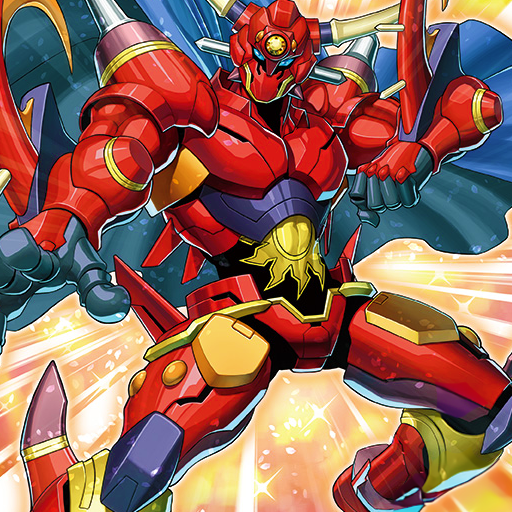

In [6]:
print("Original")
cv2_imshow(RGB_img)

Inverted


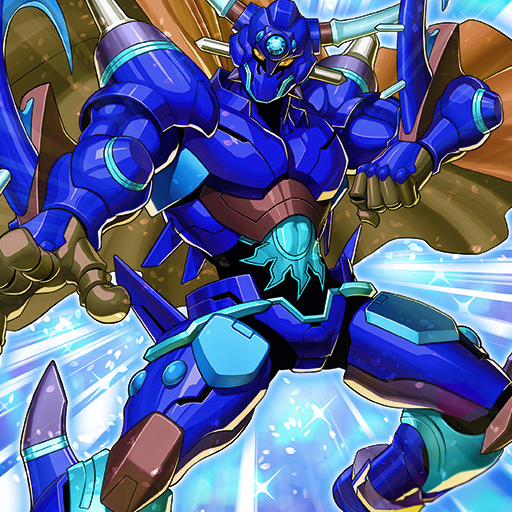

In [7]:
print("Inverted")
cv2_imshow(image)

Grayscale


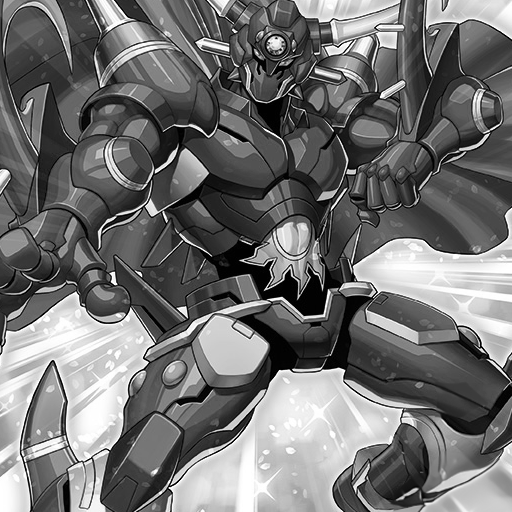

In [8]:
print("Grayscale")
cv2_imshow(img)

In [9]:
alt_img.shape

(512, 512, 3)

processing...
compressing...
Dimensions: (512, 512)
arranging...


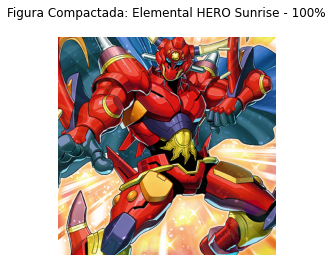

In [10]:
k=512
compress_image("Elemental HERO Sunrise - 100%",alt_img,k)

processing...
compressing...
Dimensions: (512, 512)
arranging...


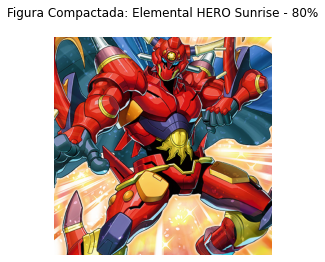

In [11]:
k=int(np.ceil(0.8*512)) #k=410
compress_image("Elemental HERO Sunrise - 80%",alt_img,k)

processing...
compressing...
Dimensions: (512, 512)
arranging...


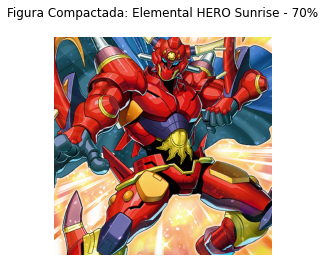

In [12]:
k=int(np.ceil(0.7*512)) #k=359
compress_image("Elemental HERO Sunrise - 70%",alt_img,k)

processing...
compressing...
Dimensions: (512, 512)
arranging...


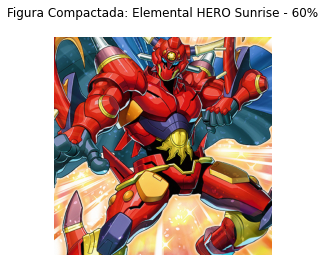

In [13]:
k=int(np.ceil(0.6*512)) #k=308
compress_image("Elemental HERO Sunrise - 60%",alt_img,k)